In [1]:
# Usando uma base de dados real do Kaggle
!pip install -q kagglehub

import kagglehub

# Baixa um dataset do Kaggle: https://www.kaggle.com/datasets/selener/consumer-complaint-database
path = kagglehub.dataset_download('selener/consumer-complaint-database')

import os

entries = os.listdir(path)
# Arquivos baixados
for entry in entries:
    print(entry)

rows.csv


In [4]:
import pandas as pd
#Ler o Arquivo CSV
data = pd.read_csv(path + '/rows.csv', parse_dates=['Date received'])

#Criar uma nova coluna com o ano e mês
data = data.rename(columns={'Date received': 'ds'})
data['ds'] = pd.to_datetime(data['ds']).dt.to_period('M').dt.to_timestamp()


#Agrupar por produto e mês, contando o número de tickets e criando um novo dataFrame
data = data.groupby(['ds']).size().reset_index(name='y')
#Dropar a ultima linha do dataset
data = data.iloc[:-1]

/tmp/ipykernel_22/2365453319.py:3: DtypeWarning: Columns (4,5,6,11,16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path + '/rows.csv', parse_dates=['Date received'])


In [5]:
# Visualizar as colunaas e as 5 primeiros registros
data.head(5)

,ds,y
0,2011-12-01,2536
1,2012-01-01,3230
2,2012-02-01,3509
3,2012-03-01,6230
4,2012-04-01,5703


In [17]:
!pip install prophet

23:44:15 - cmdstanpy - INFO - Chain [1] start processing
23:44:15 - cmdstanpy - INFO - Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


         Date  Actual  Predicted
53 2016-05-01   15517      15541
54 2016-06-01   16065      15910
55 2016-07-01   16043      18113
56 2016-08-01   17696      18014
57 2016-09-01   17584      17427
58 2016-10-01   17820      18311
59 2016-11-01   15207      16609
60 2016-12-01   15341      16530
61 2017-01-01   21006      16453
62 2017-02-01   18110      17432
63 2017-03-01   19764      23178
64 2017-04-01   18545      21572
65 2017-05-01   19305      17557
66 2017-06-01   18567      17995
67 2017-07-01   20434      20848
68 2017-08-01   21403      20696
69 2017-09-01   27357      20217
70 2017-10-01   20456      21252
71 2017-11-01   18992      19274
72 2017-12-01   19036      19170
73 2018-01-01   23654      18246
74 2018-02-01   21981      19748
75 2018-03-01   23645      26687
76 2018-04-01   24332      24716
77 2018-05-01   22345      19555
78 2018-06-01   20118      20087
79 2018-07-01   20967      23594
80 2018-08-01   21732      23385
81 2018-09-01   19080      23013
82 2018-10

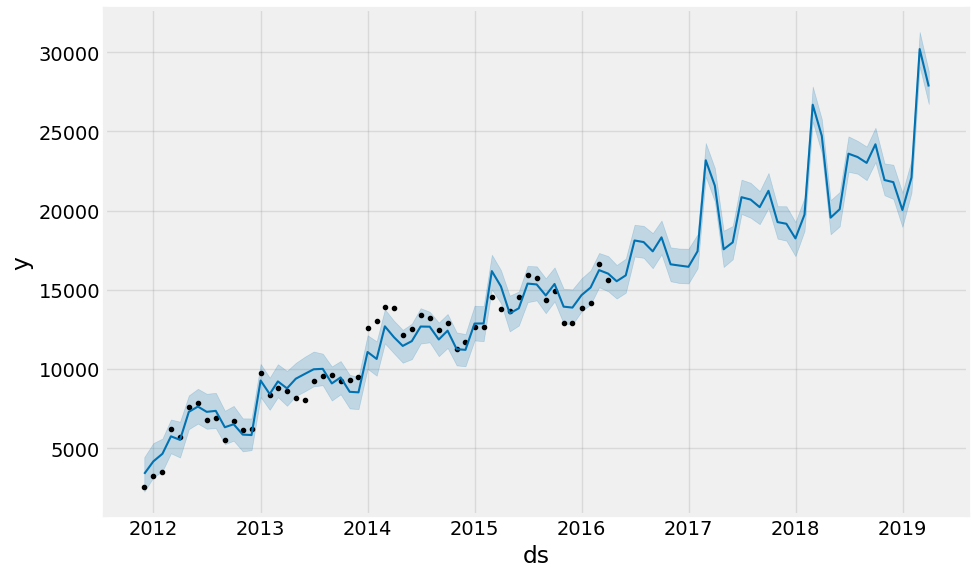

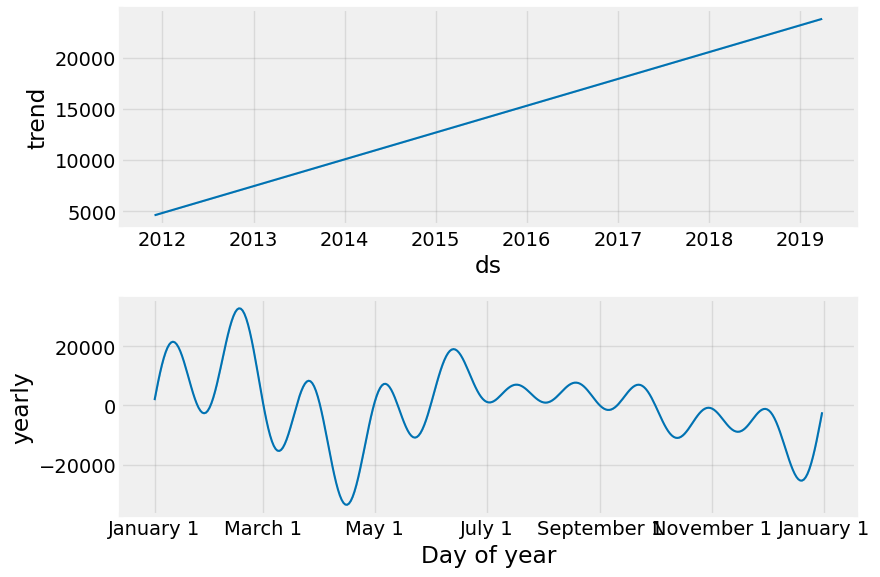

In [24]:
import pandas as pd
import prophet
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

# Divide dados em treinamento e teste
# Para séries temporais, sempre utilizamos os dados mais recentes para teste
data_train = data[:-36]
data_test  = data[-36:]

# Initialize and train the Prophet model
#model = Prophet(growth = 'linear', seasonality_mode= 'additive', yearly_seasonality=True)
model = Prophet(changepoint_prior_scale = 0.001)

model.fit(data_train)

# Create a future dataframe for predictions
future = model.make_future_dataframe(periods=36, freq='M')

# Make predictions
forecast = model.predict(future)


# Compare predictions with actual values
comparison = pd.DataFrame({'Date': data_test['ds'], 'Actual': data_test['y'], 'Predicted':  forecast['yhat'][-36:].round(0).astype(int)})

# Print the comparison dataframe
print(comparison)

# Plot the predictions
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)

In [19]:
!pip install scikit-learn

In [25]:
!pip install scikit-learn
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_squared_error

y_true = data_test['y'].values
y_pred = forecast['yhat'][-36:].values
# Erro médio absoluto
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# Erro médio quadrado
mse = mean_squared_error(y_true, y_pred)
print('MSE: %.3f' % mse)
# Raiz do erro médio quadrado
rmse = root_mean_squared_error(y_true, y_pred)
print('RMSE: %.3f' % rmse)

MAE: 2107.699
MSE: 8166271.342
RMSE: 2857.669


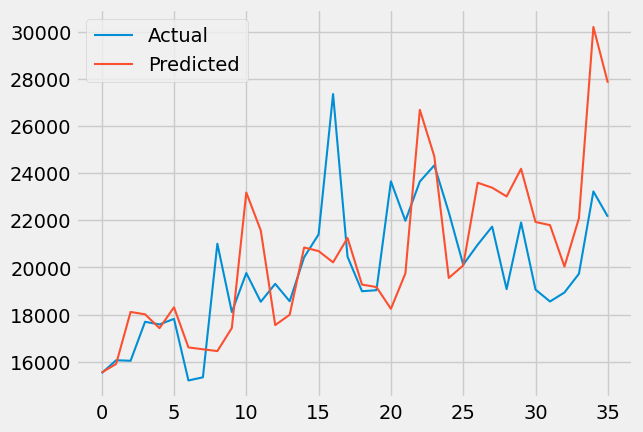

In [26]:
# Configuração do matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()